<a href="https://colab.research.google.com/github/mwithgod3952/jh_Minor_Projects/blob/main/tr_sales_trend_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install fbprophet plotly
# !pip install pydove 

In [21]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pydove as dv

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode()

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/6Th_class_Prophet_Classification_TimeGan/avocado.csv", index_col=False)
df.tail(3)

Unnamed: 0        Date  AveragePrice  ...     type  year            region
18246           9  2018-01-21          1.87  ...  organic  2018  WestTexNewMexico
18247          10  2018-01-14          1.93  ...  organic  2018  WestTexNewMexico
18248          11  2018-01-07          1.62  ...  organic  2018  WestTexNewMexico

[3 rows x 14 columns]

In [6]:
df = df.drop("Unnamed: 0", axis=1)
df.tail(3)

Date  AveragePrice  Total Volume  ...     type  year            region
18246  2018-01-21          1.87      13766.76  ...  organic  2018  WestTexNewMexico
18247  2018-01-14          1.93      16205.22  ...  organic  2018  WestTexNewMexico
18248  2018-01-07          1.62      17489.58  ...  organic  2018  WestTexNewMexico

[3 rows x 13 columns]

In [7]:
df_Date =   df['Date'].unique()
df_type =   df['type'].unique()
df_region = df['region'].unique()
print("Date_shape", df_Date.shape, " / ", "type_shape", df_type.shape, " / ", "region_shape", df_region.shape)

Date_shape (169,)  /  type_shape (2,)  /  region_shape (54,)


In [8]:
df_as_ts = df.copy()
df_as_ts['Date'] = pd.to_datetime(df_as_ts['Date'])
type(df_as_ts['Date'])

pandas.core.series.Series

In [9]:
df_as_ts.index = df_as_ts['Date']

In [10]:
print("numbers of factor about region : ", df_as_ts["region"].unique().shape)
print("=" * 39)
print("factors of region : ")
for x in range(len(df_as_ts["region"].unique())):
    print(df_as_ts["region"].unique()[x])

numbers of factor about region :  (54,)
factors of region : 
Albany
Atlanta
BaltimoreWashington
Boise
Boston
BuffaloRochester
California
Charlotte
Chicago
CincinnatiDayton
Columbus
DallasFtWorth
Denver
Detroit
GrandRapids
GreatLakes
HarrisburgScranton
HartfordSpringfield
Houston
Indianapolis
Jacksonville
LasVegas
LosAngeles
Louisville
MiamiFtLauderdale
Midsouth
Nashville
NewOrleansMobile
NewYork
Northeast
NorthernNewEngland
Orlando
Philadelphia
PhoenixTucson
Pittsburgh
Plains
Portland
RaleighGreensboro
RichmondNorfolk
Roanoke
Sacramento
SanDiego
SanFrancisco
Seattle
SouthCarolina
SouthCentral
Southeast
Spokane
StLouis
Syracuse
Tampa
TotalUS
West
WestTexNewMexico


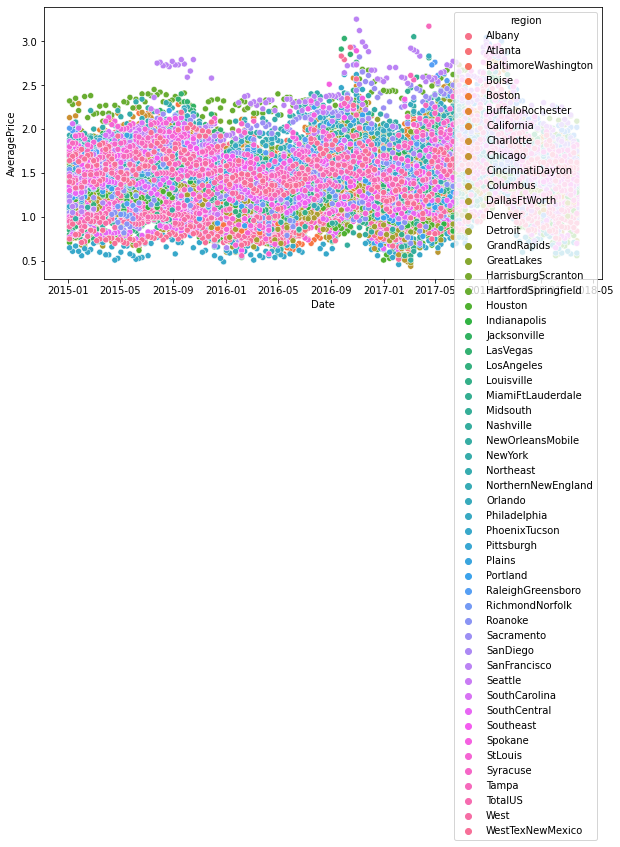

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(df_as_ts.index, df_as_ts['AveragePrice'], data=df_as_ts, hue="region")
plt.show()

In [13]:
lst = []
for i in range(len(df_as_ts["region"].unique())):
    lst.append(df_as_ts.iloc[np.where(df_as_ts["region"] == df_as_ts["region"].unique()[i])])
np.shape(lst)   

(54,)

In [20]:
import pydove as dv

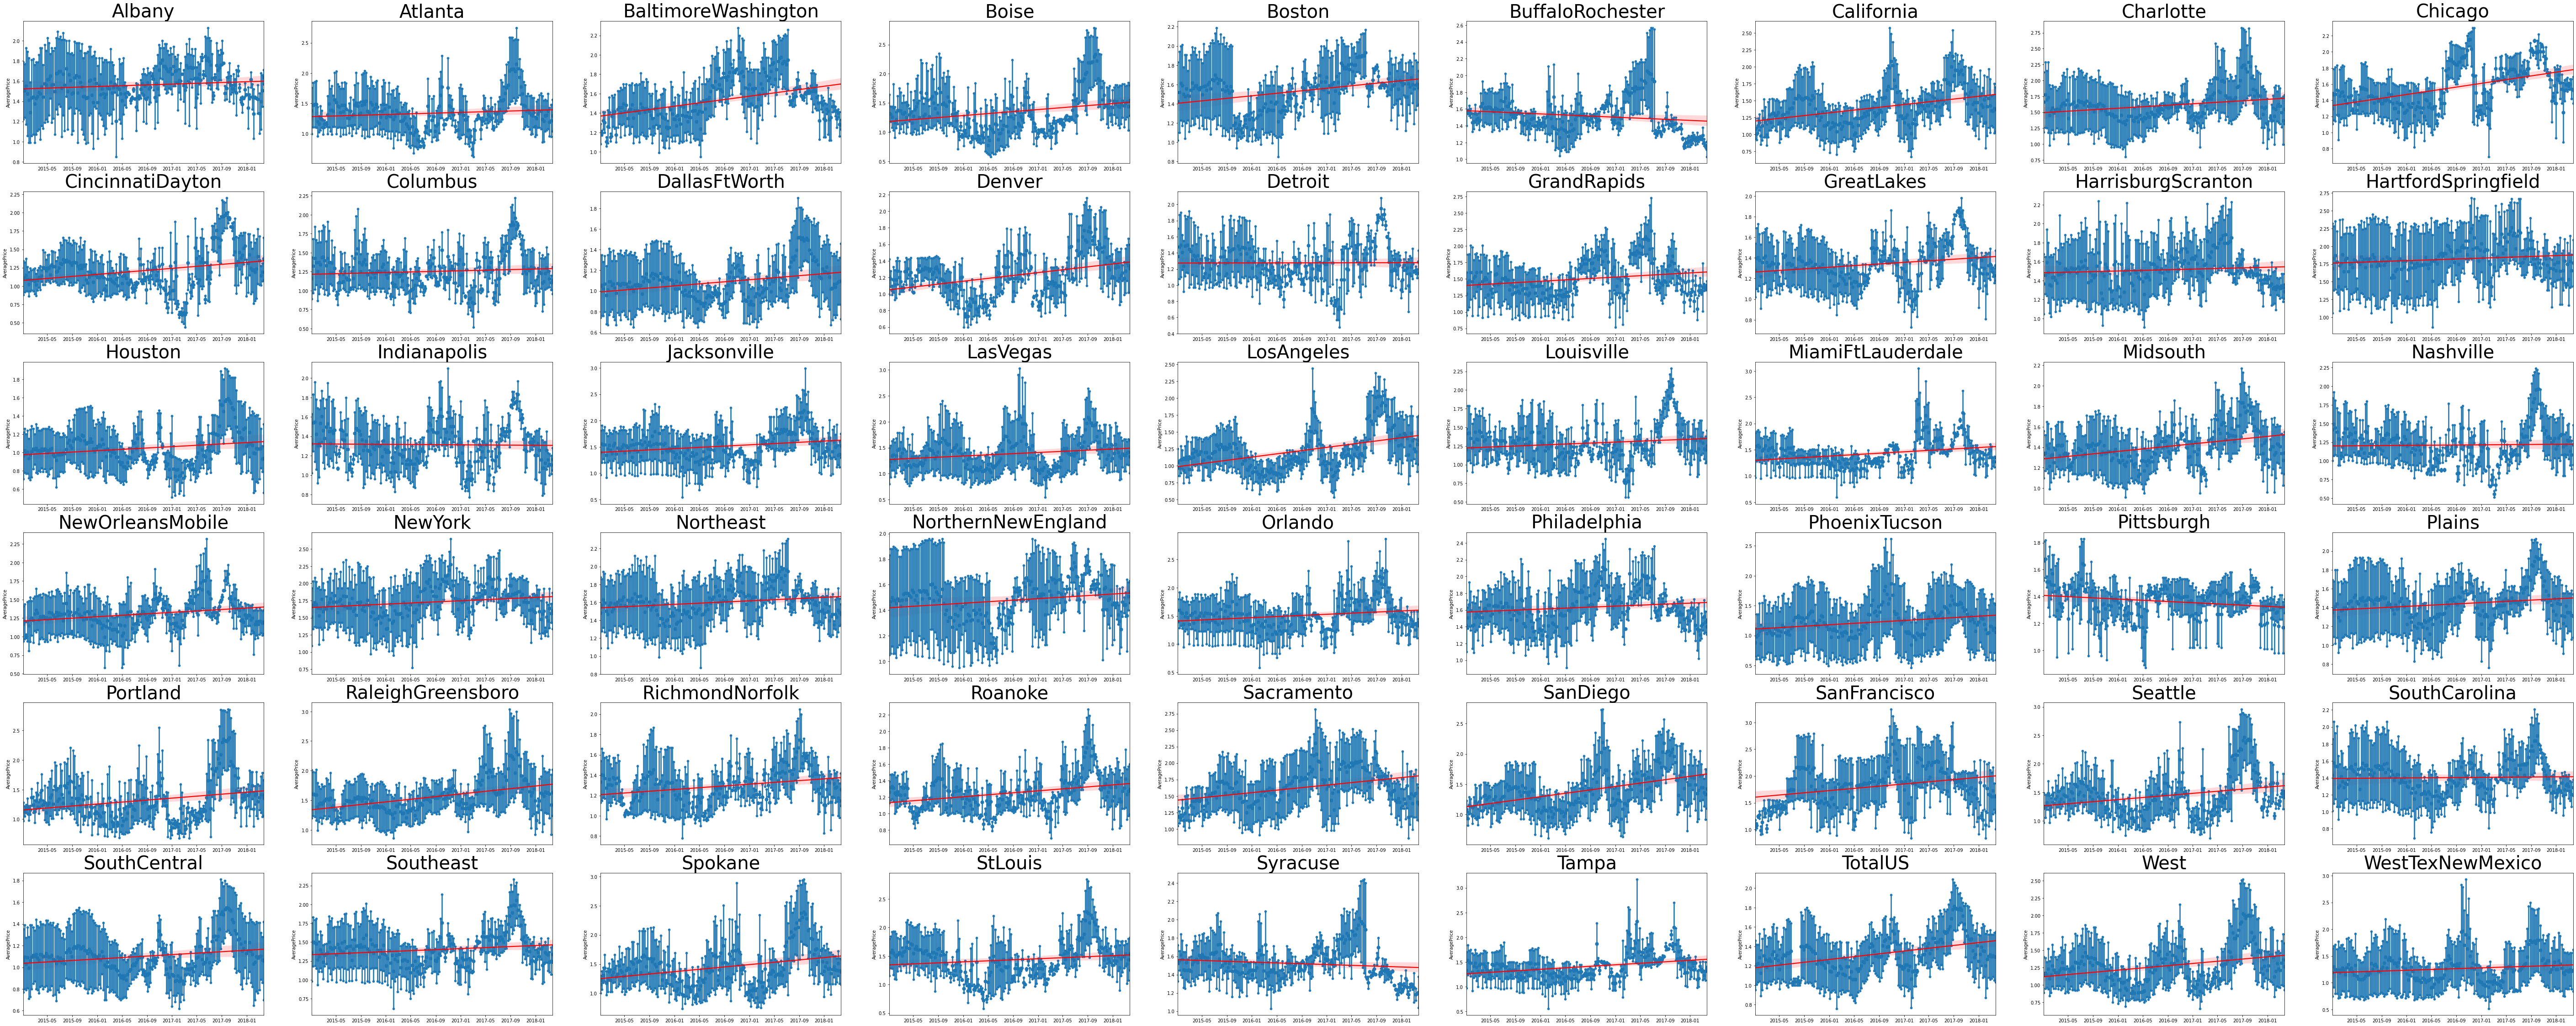

In [70]:
plt.figure(figsize=(100, 40))
res_lst = []
tle_lst = []
n = 0
for x in lst:

   ax = plt.subplot(6, 9, n+1) 

   X = np.array(x.index.to_pydatetime(), dtype=np.datetime64) 
   Y = x["AveragePrice"]

   ax.xaxis.update_units(X)
   sns.scatterplot(X, Y)
   sns.regplot(x=ax.xaxis.convert_units(X), y=Y, data=x, x_estimator=np.mean, logx=True, line_kws={"color": "red"})

   res = sm.OLS(Y, ax.xaxis.convert_units(X)).fit()
   res_lst.append(res)

   ax.set_title(x.region.unique()[0], fontsize=40)
   tle_lst.append((x.region.unique()[0]))

   n = n+1 

***regplot 결과값 분해***

In [72]:
params = []
for i in range(len(res_lst)):
    params.append(res_lst[i].params[0])

par_df = pd.DataFrame()
par_df["parmas"] = params
par_df["region"] = tle_lst

par_df

parmas               region
0   0.000002               Albany
1   0.000002              Atlanta
2   0.000002  BaltimoreWashington
3   0.000002                Boise
4   0.000002               Boston
5   0.000002     BuffaloRochester
6   0.000002           California
7   0.000002            Charlotte
8   0.000002              Chicago
9   0.000002     CincinnatiDayton
10  0.000002             Columbus
11  0.000001        DallasFtWorth
12  0.000002               Denver
13  0.000002              Detroit
14  0.000002          GrandRapids
15  0.000002           GreatLakes
16  0.000002   HarrisburgScranton
17  0.000002  HartfordSpringfield
18  0.000001              Houston
19  0.000002         Indianapolis
20  0.000002         Jacksonville
21  0.000002             LasVegas
22  0.000002           LosAngeles
23  0.000002           Louisville
24  0.000002    MiamiFtLauderdale
25  0.000002             Midsouth
26  0.000002            Nashville
27  0.000002     NewOrleansMobile
28  0.000002              NewYork
29  0.000002            Northeast
30  0.000002   NorthernNewEngland
31  0.000002              Orlando
32  0.000002         Philadelphia
33  0.000002        PhoenixTucson
34  0.000002           Pittsburgh
35  0.000002               Plains
36  0.000002             Portland
37  0.000002    RaleighGreensboro
38  0.000002      RichmondNorfolk
39  0.000002              Roanoke
40  0.000002           Sacramento
41  0.000002             SanDiego
42  0.000002         SanFrancisco
43  0.000002              Seattle
44  0.000002        SouthCarolina
45  0.000001         SouthCentral
46  0.000002            Southeast
47  0.000002              Spokane
48  0.000002              StLouis
49  0.000002             Syracuse
50  0.000002                Tampa
51  0.000002              TotalUS
52  0.000002                 West
53  0.000002     WestTexNewMexico